## Import Libraries

In [1]:
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

note :  regression - linear activation function (maybe use ReLu instead, bcoz we donr have Y is a negative number)


note
sigmoid : y = 0 / 1
linear : y = + / -
relu : y = 0 / +

so, for dense layer maybe we use relu activation func too
conclusion : hidden layers = relu or linear, output layers = relu

## Import Dataset

In [3]:
df = pd.read_csv(r'../Dataset/Golap_Dataset_Final.csv')

df.head()

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_Rupee,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Laptop_Company,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link
0,1,https://www.flipkart.com/acer-aspire-3-core-i3...,acer aspire 3 core i3 11th gen_type(1),4.2,34999,2,0,1,1,4,...,8,256,intel core i3 11th gen,362,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/k...
1,2,https://www.flipkart.com/acer-aspire-3-core-i3...,acer aspire 3 core i3 11th gen_type(2),NaN,38990,2,0,1,1,8,...,8,512,intel core i3 11th gen,362,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/l...
2,3,https://www.flipkart.com/acer-aspire-3-core-i5...,acer aspire 3 core i5 10th gen_type(1),3.2,45990,4,2,1,0,8,...,8,1000,intel core i5 10th gen,187,4.5,nvidia geforce gtx mx 330,16.50,4,57,https://rukminim2.flixcart.com/image/416/416/k...
3,4,https://www.flipkart.com/acer-aspire-3-core-i5...,acer aspire 3 core i5 11th gen_type(1),NaN,48990,2,0,1,0,8,...,8,1000,intel core i5 11th gen,108,4.5,iris xe,17.50,4,4,https://rukminim2.flixcart.com/image/416/416/l...
4,5,https://www.flipkart.com/acer-aspire-3-core-i5...,acer aspire 3 core i5 11th gen_type(2),NaN,49890,2,0,1,1,8,...,8,512,intel core i5 11th gen,108,4.5,intel iris xe,17.50,4,8,https://rukminim2.flixcart.com/image/416/416/x...


## Data Preprocessing

In [4]:
df.columns

Index(['Laptop_Index', 'Link_References', 'Laptop_Name', 'User_Rating',
       'Price_in_Rupee', 'Laptop_Type', 'Dedicated_GPU_in_GB',
       'Processor_Brand', 'Storage_Type', 'RAM_in_GB', 'RAM_Type',
       'Memory_Type', 'OS', 'Touchscreen_Features', 'Screen_Size_in_Inch',
       'Weight_in_Kg', 'Refresh_Rate', 'Screen_Resolution', 'Laptop_Company',
       'Storage_Capacity', 'Processor', 'CPU_Rank', 'Battery_Lifetime_in_Hrs',
       'GPU', 'GPU_Benchmark_Score', 'RAM_Type_Tokenized',
       'GPU_Processor_Tokenized', 'Image_Link'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Laptop_Index             983 non-null    int64  
 1   Link_References          983 non-null    object 
 2   Laptop_Name              983 non-null    object 
 3   User_Rating              689 non-null    float64
 4   Price_in_Rupee           983 non-null    int64  
 5   Laptop_Type              983 non-null    int64  
 6   Dedicated_GPU_in_GB      983 non-null    int64  
 7   Processor_Brand          983 non-null    int64  
 8   Storage_Type             983 non-null    int64  
 9   RAM_in_GB                983 non-null    int64  
 10  RAM_Type                 983 non-null    object 
 11  Memory_Type              983 non-null    int64  
 12  OS                       983 non-null    int64  
 13  Touchscreen_Features     983 non-null    int64  
 14  Screen_Size_in_Inch      9

In [6]:
X = df.drop(columns=[
    'Laptop_Index', 
    'Link_References',
    'Laptop_Name',
    'User_Rating',
    'RAM_Type',
    'Processor',
    'GPU',
    'Image_Link',
    'Price_in_Rupee'
])

y = df['Price_in_Rupee']


In [7]:
X

,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,Memory_Type,OS,Touchscreen_Features,Screen_Size_in_Inch,Weight_in_Kg,Refresh_Rate,Screen_Resolution,Laptop_Company,Storage_Capacity,CPU_Rank,Battery_Lifetime_in_Hrs,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized
0,2,0,1,1,4,1,1,0,15.6,1.70,60,1080,8,256,362,4.5,5.05,4,7
1,2,0,1,1,8,0,1,0,15.6,1.70,60,1080,8,512,362,4.5,5.05,4,7
2,4,2,1,0,8,1,1,0,15.6,1.90,60,1080,8,1000,187,4.5,16.50,4,57
3,2,0,1,0,8,0,1,0,15.6,1.70,60,1080,8,1000,108,4.5,17.50,4,4
4,2,0,1,1,8,0,1,0,15.6,1.70,60,1080,8,512,108,4.5,17.50,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2,0,2,1,8,0,1,0,15.6,1.77,60,1080,16,512,330,4.5,10.60,4,11
979,2,0,2,1,8,0,1,0,15.6,1.77,60,1080,16,512,330,4.5,10.60,4,11
980,2,0,2,1,8,0,1,0,15.6,1.77,60,1080,16,512,75,4.5,10.90,4,15
981,2,0,2,1,8,0,1,0,15.6,1.77,60,1080,16,512,75,4.5,10.90,4,15


In [8]:
y

0      34999
1      38990
2      45990
3      48990
4      49890
       ...  
978    49590
979    50990
980    56990
981    57990
982    62890
Name: Price_in_Rupee, Length: 983, dtype: int64

###### cleaning data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X

,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,Memory_Type,OS,Touchscreen_Features,Screen_Size_in_Inch,Weight_in_Kg,Refresh_Rate,Screen_Resolution,Laptop_Company,Storage_Capacity,CPU_Rank,Battery_Lifetime_in_Hrs,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized
0,2,0,1,1,4,1,1,0,15.6,1.70,60,1080,8,256,362,4.5,5.05,4,7
1,2,0,1,1,8,0,1,0,15.6,1.70,60,1080,8,512,362,4.5,5.05,4,7
2,4,2,1,0,8,1,1,0,15.6,1.90,60,1080,8,1000,187,4.5,16.50,4,57
3,2,0,1,0,8,0,1,0,15.6,1.70,60,1080,8,1000,108,4.5,17.50,4,4
4,2,0,1,1,8,0,1,0,15.6,1.70,60,1080,8,512,108,4.5,17.50,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2,0,2,1,8,0,1,0,15.6,1.77,60,1080,16,512,330,4.5,10.60,4,11
979,2,0,2,1,8,0,1,0,15.6,1.77,60,1080,16,512,330,4.5,10.60,4,11
980,2,0,2,1,8,0,1,0,15.6,1.77,60,1080,16,512,75,4.5,10.90,4,15
981,2,0,2,1,8,0,1,0,15.6,1.77,60,1080,16,512,75,4.5,10.90,4,15


In [11]:
y

0      34999
1      38990
2      45990
3      48990
4      49890
       ...  
978    49590
979    50990
980    56990
981    57990
982    62890
Name: Price_in_Rupee, Length: 983, dtype: int64

In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.values.reshape(-1, 1)  # Convert y_train to 2D
y_test = y_test.values.reshape(-1, 1)    # Convert y_test to 2D

# Now apply the StandardScaler
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [13]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [14]:
X_train.shape

TensorShape([786, 19])

## Model ML

In [15]:
model = Sequential(
    [   
        tf.keras.Input(shape=(19,)),
        Dense(units = 15, activation = 'relu', name = "Layer_1"),        # layer 1
        Dense(units = 10, activation = 'relu', name = "Layer_2"),         # layer 2
        Dense(units = 1)                                                   # output layers
    ], name="GoLap_Prediction"
)

In [16]:
model.summary()

Model: "GoLap_Prediction"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ (None, 15)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
[layer1, layer2, layer3] = model.layers

In [18]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (19, 15), b1 shape = (15,)
W2 shape = (15, 10), b2 shape = (10,)
W3 shape = (10, 1), b3 shape = (1,)


In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=MeanSquaredError
)

In [19]:
history = model.fit(
    X_train,  
    y_train,
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6036 - val_loss: 1.2104
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9479 - val_loss: 0.7785
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6876 - val_loss: 0.5787
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4693 - val_loss: 0.4541
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4541 - val_loss: 0.3741
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3688 - val_loss: 0.3210
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3169 - val_loss: 0.2837
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2810 - val_loss: 0.2568
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3001 - val_loss: 0.2365
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2271 - val_loss: 0.2198
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2828 - val_loss: 0.2060
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2531 - val_lo

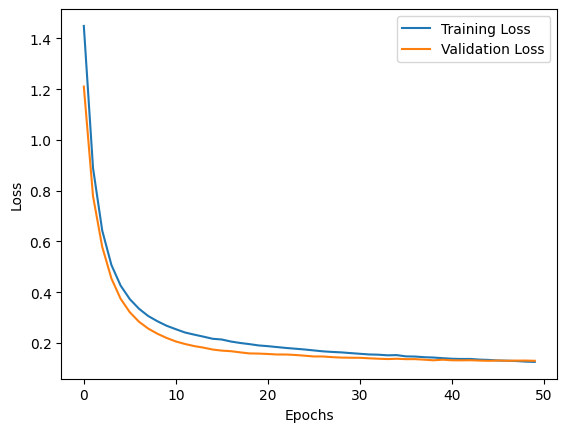

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1249
Test Loss: 0.12985612452030182


In [27]:
y_test = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [28]:
y_ori = scaler.inverse_transform(y_test)

In [29]:
print(y_ori)

[[ 72883.984]
 [ 73719.49 ]
 [ 73386.29 ]
 [ 67395.836]
 [ 64922.516]
 [ 68257.414]
 [173660.98 ]
 [ 68331.266]
 [ 71791.13 ]
 [ 53222.75 ]
 [ 88070.555]
 [115267.42 ]
 [ 71560.94 ]
 [ 72645.28 ]
 [ 72399.92 ]
 [ 87850.55 ]
 [ 76080.96 ]
 [ 66407.74 ]
 [ 68019.46 ]
 [ 75826.96 ]
 [ 72645.48 ]
 [ 97401.37 ]
 [ 73927.19 ]
 [ 72552.51 ]
 [ 90924.33 ]
 [ 69997.63 ]
 [ 69704.37 ]
 [ 72507.84 ]
 [ 93848.125]
 [ 67450.22 ]
 [ 40213.945]
 [ 76999.77 ]
 [ 72982.56 ]
 [ 84150.77 ]
 [106059.28 ]
 [ 82329.4  ]
 [ 63735.06 ]
 [ 71154.54 ]
 [ 37053.62 ]
 [ 69659.8  ]
 [ 64044.05 ]
 [169561.86 ]
 [ 92380.53 ]
 [ 67687.6  ]
 [ 67200.55 ]
 [ 70562.22 ]
 [ 69997.63 ]
 [ 73543.46 ]
 [ 66105.9  ]
 [ 72645.28 ]
 [ 70701.27 ]
 [ 70010.59 ]
 [ 72982.56 ]
 [ 74065.984]
 [ 97166.555]
 [ 69755.98 ]
 [142848.55 ]
 [100282.16 ]
 [ 72138.62 ]
 [ 62075.383]
 [ 67995.51 ]
 [ 77520.51 ]
 [ 64986.055]
 [ 72616.055]
 [ 69741.64 ]
 [ 72215.375]
 [ 64857.25 ]
 [ 74271.7  ]
 [ 73483.414]
 [ 69962.055]
 [ 66617.84 ]
 [ 698

In [20]:
# dont know how to save it
# model.save('model.keras')

In [23]:
# Contoh model sederhana
model = Sequential([
    Dense(10, activation='relu', input_shape=(5,)),
    Dense(1)
])

# Kompilasi model dengan MeanSquaredError
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])


d:\PROJECT\tensorflow\obeject_tf1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.save('prediction.keras')
model.save('prediction.h5')


In [25]:
from tensorflow.keras.models import load_model
model = load_model('prediction.keras')


d:\PROJECT\tensorflow\obeject_tf1\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
